# Landfire + FIRED Data EDA

## FIRED Data (CONUS)

Overview of FIRED data (CONUS):

| **Variable**       | **Description**                                     | **Why It’s Useful?** |
|-------------------|-------------------------------------------------|------------------|
| `ig_date`        | Initial ignition date                           | Defines the start time of the fire |
| `event_day`      | Days since ignition                            | Tracks the duration of fire progression |
| `tot_px`, `tot_ar_km2` | Total area burned (pixels & km²)            | Measures fire growth over time |
| `fsr_px_dy`, `fsr_km2_dy` | Fire spread rate (pixels/km² per day)     | Helps model fire acceleration & rate of spread |
| `mx_grw_px`, `mn_grw_px`, `mu_grw_px` | Max, min, and mean daily growth (pixels) | Useful for estimating fire expansion trends |
| `mx_grw_km2`, `mn_grw_km2`, `mu_grw_km2` | Growth rate in km²              | Alternative fire size estimation metric |
| `mx_grw_dte`    | Date of max spread                             | Identifies peak fire activity days |
| `lc_name`, `lc_desc` | Land cover type                              | Determines fuel type (e.g., forest, grassland, shrubland) |
| `eco_name`, `eco_type` | Ecoregion information                    | Helps model fire behavior based on vegetation & climate |
| `tot_perim`     | Total perimeter of fire event                  | Determines fire shape and spread patterns |
| `ig_utm_x`, `ig_utm_y` | Ignition location (UTM coordinates)      | Allows spatial analysis of wildfire progression |


In [2]:
import os

import pandas as pd

DATA_DIR = '../data/conus_ak/'

fired_conus_ak_df = pd.read_csv(os.path.join(DATA_DIR, 'fired_conus_ak_2000_to_2024_events.csv'))
fired_conus_ak_df.head()

,id,geometry,ig_date,ig_day,ig_month,ig_year,last_date,event_dur,tot_pix,tot_ar_km2,...,ig_utm_y,lc_code,lc_mode,lc_name,lc_desc,lc_type,eco_mode,eco_name,eco_type,tot_perim
0,1,MULTIPOLYGON (((-10010798.656358264 4834667.34...,2007-02-01 00:00:00,32,2,2007,2007-02-01 00:00:00,1,1,0.214659,...,4834900.0,1,1,Evergreen Needleleaf Forests,Dominated by evergreen conifer trees (canopy>2...,IGBP global vegetation classification scheme,10.0,Central Pacific coastal forests,WWF Terrestrial Ecoregions of the World,1861.250866
1,3,MULTIPOLYGON (((-10013578.656358264 4818451.34...,2003-10-31 00:00:00,304,10,2003,2003-11-04 00:00:00,5,5,1.073293,...,4818221.0,1,1,Evergreen Needleleaf Forests,Dominated by evergreen conifer trees (canopy>2...,IGBP global vegetation classification scheme,10.0,Central Pacific coastal forests,WWF Terrestrial Ecoregions of the World,7419.250866
2,4,MULTIPOLYGON (((-10026087.656358264 4817061.34...,2007-02-02 00:00:00,33,2,2007,2007-02-02 00:00:00,1,2,0.429317,...,4817294.0,1,1,Evergreen Needleleaf Forests,Dominated by evergreen conifer trees (canopy>2...,IGBP global vegetation classification scheme,10.0,Central Pacific coastal forests,WWF Terrestrial Ecoregions of the World,2787.250866
3,5,MULTIPOLYGON (((-10025624.656358264 4816598.34...,2013-10-30 00:00:00,303,10,2013,2013-10-30 00:00:00,1,1,0.214659,...,4816831.0,1,1,Evergreen Needleleaf Forests,Dominated by evergreen conifer trees (canopy>2...,IGBP global vegetation classification scheme,10.0,Central Pacific coastal forests,WWF Terrestrial Ecoregions of the World,1861.250866
4,6,MULTIPOLYGON (((-10024234.656358264 4816134.84...,2013-10-30 00:00:00,303,10,2013,2013-10-30 00:00:00,1,1,0.214659,...,4816367.5,1,1,Evergreen Needleleaf Forests,Dominated by evergreen conifer trees (canopy>2...,IGBP global vegetation classification scheme,10.0,Central Pacific coastal forests,WWF Terrestrial Ecoregions of the World,1861.250866



Wildfire Counts by Year:
ig_year
2000      704
2001     6228
2002    10460
2003    15897
2004    23347
2005    18351
2006    13141
2007    14767
2008    14153
2009    14879
Name: count, dtype: int64

Wildfire Counts by Region:
eco_name
Mississippi lowland forests              55263
Southeastern conifer forests             33516
Interior Alaska-Yukon lowland taiga      31026
Everglades                               18882
Interior Yukon-Alaska alpine tundra      11869
Central and Southern mixed grasslands    11617
Central forest-grasslands transition     10064
Flint Hills tall grasslands               9297
Snake-Columbia shrub steppe               9146
Southeastern mixed forests                8769
Name: count, dtype: int64

Wildfire Density by Region (Total Area Burned in km²):
eco_name
Interior Alaska-Yukon lowland taiga     67401.320804
Mississippi lowland forests             63674.631577
Flint Hills tall grasslands             52795.086039
Southeastern conifer forests            491

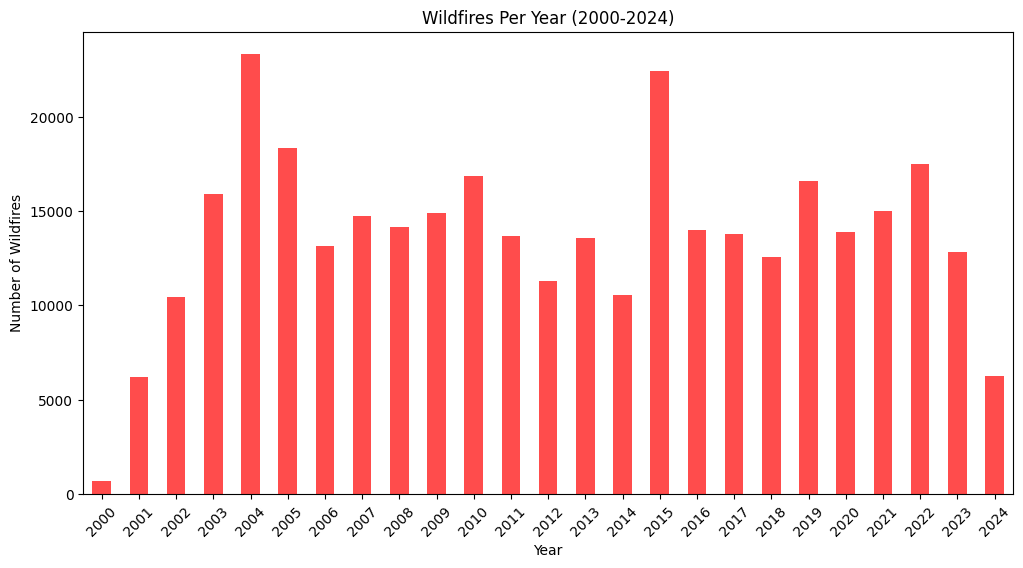

In [14]:
import matplotlib.pyplot as plt

# Convert ignition date to datetime format
fired_conus_ak_df['ig_date'] = pd.to_datetime(fired_conus_ak_df['ig_date'])  

# Count wildfires per year
wildfire_counts_by_year = fired_conus_ak_df['ig_year'].value_counts().sort_index()

# Count wildfires per region (ecoregion)
wildfire_counts_by_region = fired_conus_ak_df['eco_name'].value_counts()

# Calculate wildfire density per ecoregion (total area burned per region)
wildfire_density_by_region = (
    fired_conus_ak_df.groupby('eco_name')['tot_ar_km2']
    .sum()
    .sort_values(ascending=False)
)

# Find consecutive or close wildfires in the same area (fires within 10 days in the same region)
fired_conus_ak_df = fired_conus_ak_df.sort_values(by=['eco_name', 'ig_date'])
fired_conus_ak_df['date_diff'] = fired_conus_ak_df.groupby('eco_name')['ig_date'].diff().dt.days
close_wildfires = fired_conus_ak_df[fired_conus_ak_df['date_diff'] <= 10]

# Display results
# Show wildfire counts by year
print("\nWildfire Counts by Year:")
print(wildfire_counts_by_year.head(10))  # Display first 10 years

# Show wildfire counts by region
print("\nWildfire Counts by Region:")
print(wildfire_counts_by_region.head(10))  # Display first 10 regions

# Show wildfire density by region
print("\nWildfire Density by Region (Total Area Burned in km²):")
print(wildfire_density_by_region.head(10))  # Display first 10 regions

# Show consecutive wildfires in the same area
print("\nClose Wildfires in the Same Region (within 10 days):")
print(close_wildfires[['eco_name', 'ig_date', 'date_diff']].head(10))  # Display first 10 occurrences

# Plot wildfires per year
plt.figure(figsize=(12, 6))
wildfire_counts_by_year.plot(kind='bar', color='red', alpha=0.7)
plt.title("Wildfires Per Year (2000-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Wildfires")
plt.xticks(rotation=45)
plt.show()

In [13]:
import pandas as pd

def group_by_date(df, time_period='year'):
    """
    Groups the DataFrame by a specified time period.
    
    Parameters:
    - df: pandas DataFrame
    - time_period: str, options: 'year', 'month', 'day'
    
    Returns:
    - Grouped DataFrame
    """
    if time_period == 'year':
        return df.groupby('ig_year')
    elif time_period == 'month':
        return df.groupby(['ig_year', 'ig_month'])
    elif time_period == 'day':
        return df.groupby(['ig_year', 'ig_month', 'ig_day'])
    else:
        raise ValueError("Invalid time_period. Choose from 'year', 'month', or 'day'.")

def group_by_area(df, area_col='eco_name'):
    """
    Groups the DataFrame by a specified area column.
    
    Parameters:
    - df: pandas DataFrame
    - area_col: str, column name representing spatial classification
    
    Returns:
    - Grouped DataFrame
    """
    if area_col not in df.columns:
        raise ValueError(f"Column {area_col} not found in DataFrame.")
    return df.groupby(area_col)

def filter_by_date_range(df, start_date, end_date):
    """
    Filters the DataFrame by a given date range.
    
    Parameters:
    - df: pandas DataFrame
    - start_date: str (YYYY-MM-DD) or datetime object
    - end_date: str (YYYY-MM-DD) or datetime object
    
    Returns:
    - Filtered DataFrame
    """
    df['ig_date'] = pd.to_datetime(df['ig_date'])
    return df[(df['ig_date'] >= start_date) & (df['ig_date'] <= end_date)]

def filter_by_area(df, area_name, area_col='eco_name'):
    """
    Filters the DataFrame by a specified area.
    
    Parameters:
    - df: pandas DataFrame
    - area_name: str, name of the area to filter
    - area_col: str, column representing spatial classification
    
    Returns:
    - Filtered DataFrame
    """
    return df[df[area_col] == area_name]

def filter_by_land_cover(df, land_cover_type):
    """
    Filters the DataFrame based on land cover type.
    
    Parameters:
    - df: pandas DataFrame
    - land_cover_type: str, name of land cover type
    
    Returns:
    - Filtered DataFrame
    """
    return df[df['lc_name'] == land_cover_type]

grouped_by_year = group_by_date(fired_conus_ak_df, 'year')
filtered_by_area = filter_by_area(fired_conus_ak_df, 'Central Pacific coastal forests')
filtered_by_date = filter_by_date_range(fired_conus_ak_df, '2005-01-01', '2010-12-31')
filtered_by_land_cover = filter_by_land_cover(fired_conus_ak_df, 'Evergreen Needleleaf Forests')

# Fire Event Visualizations

Total number of fire events: 342731
Date range: 2000-10-31 00:00:00 to 2024-07-30 00:00:00
Total area burned: 828210.48 km²


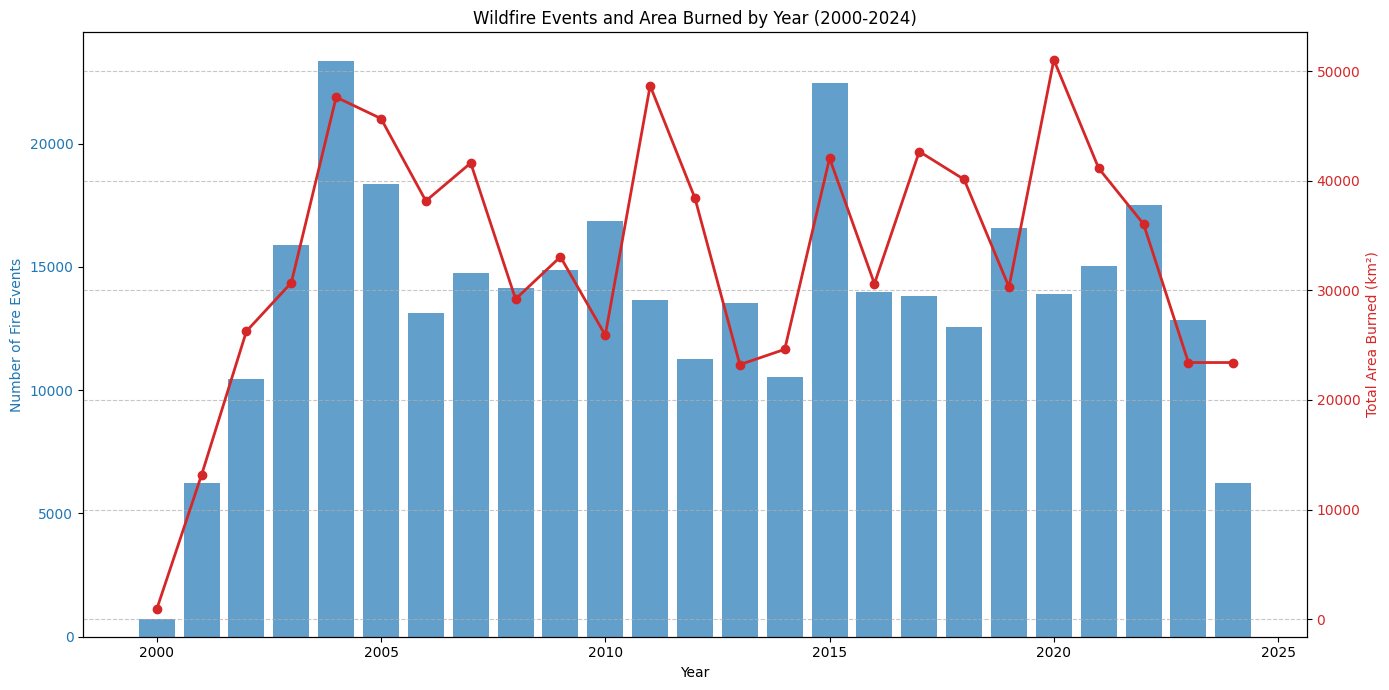

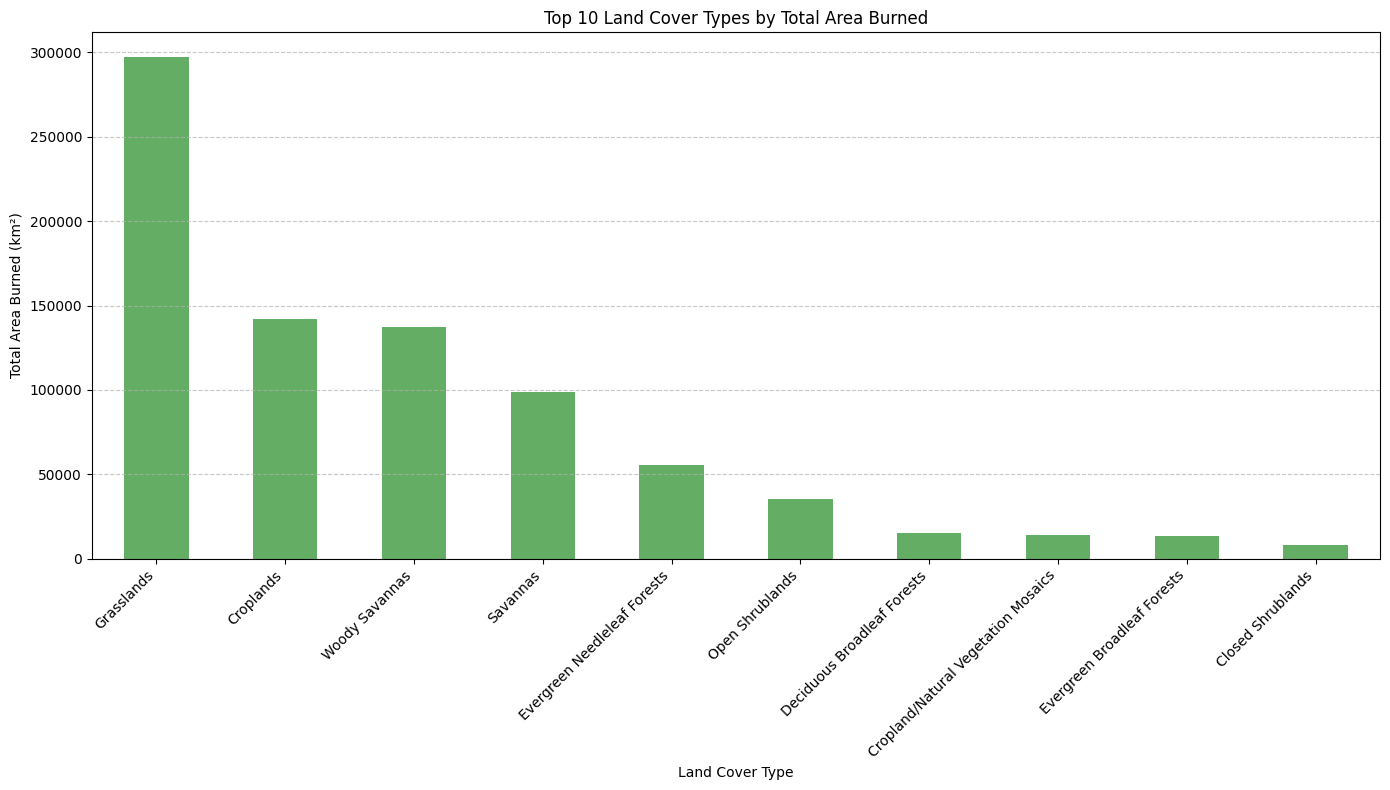

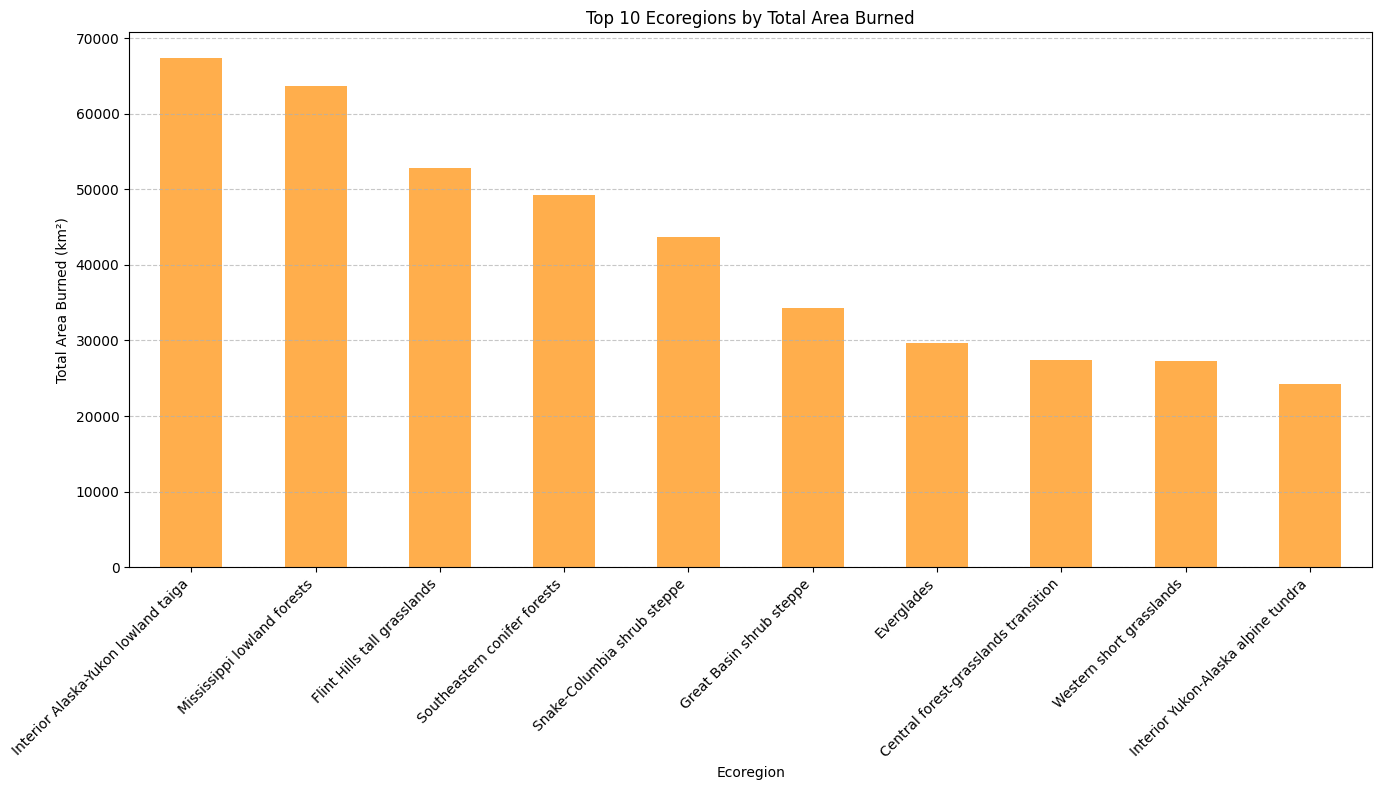

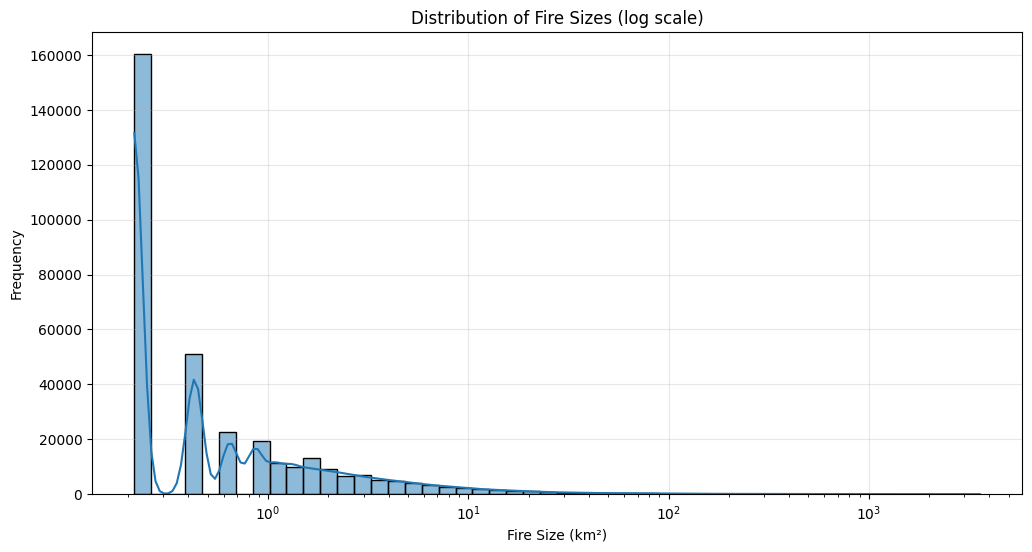

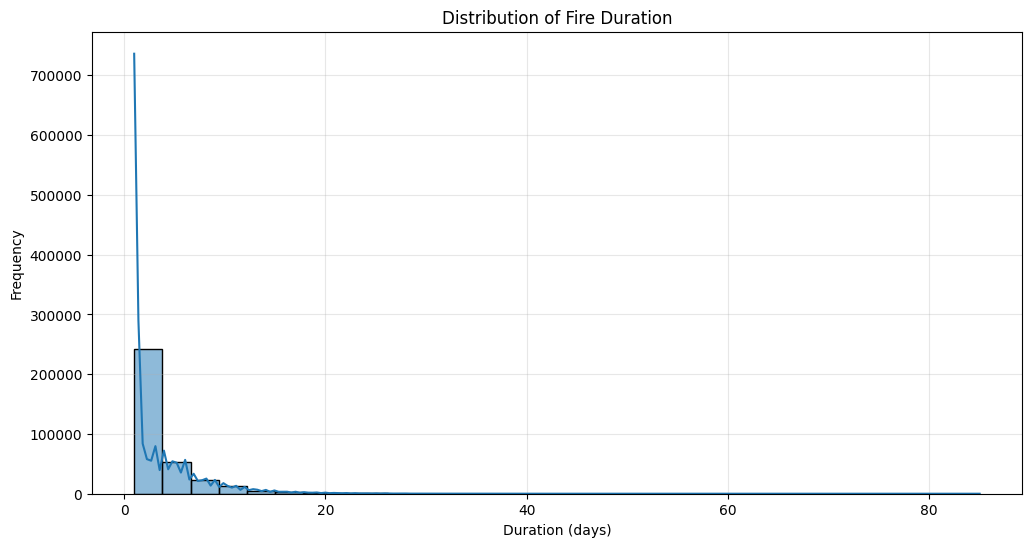

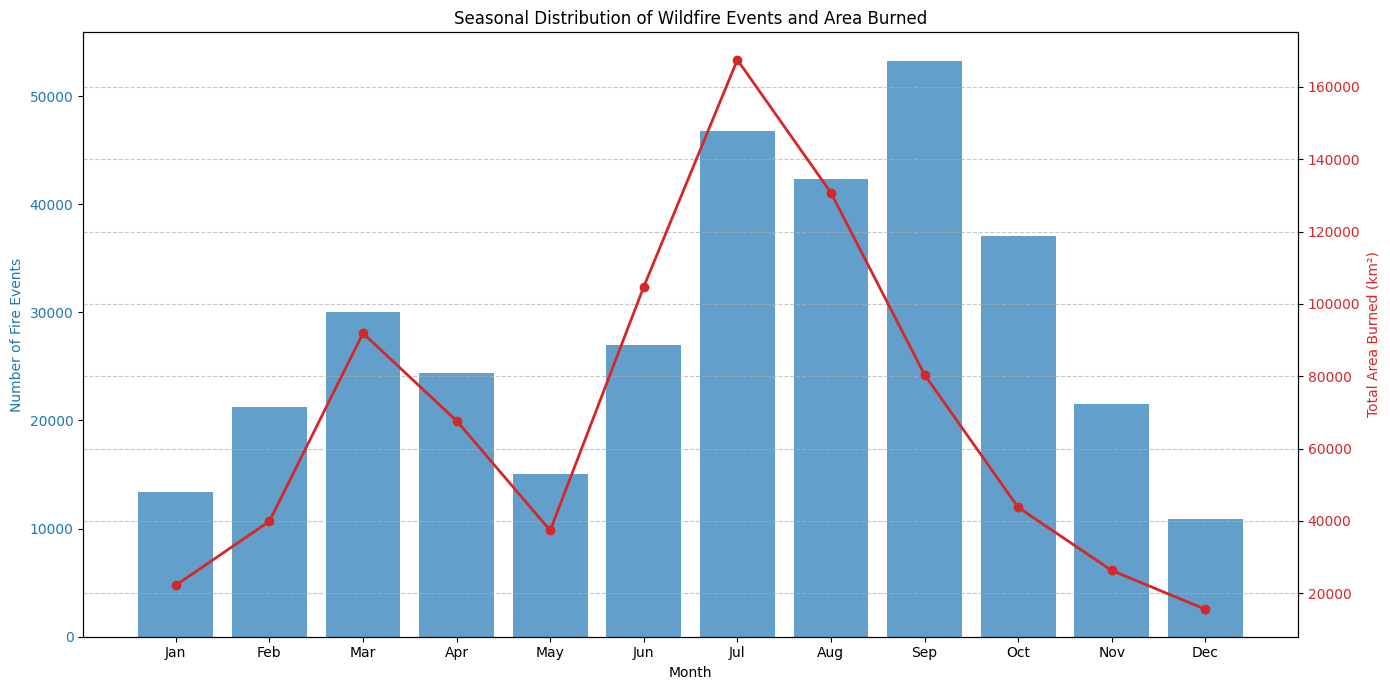

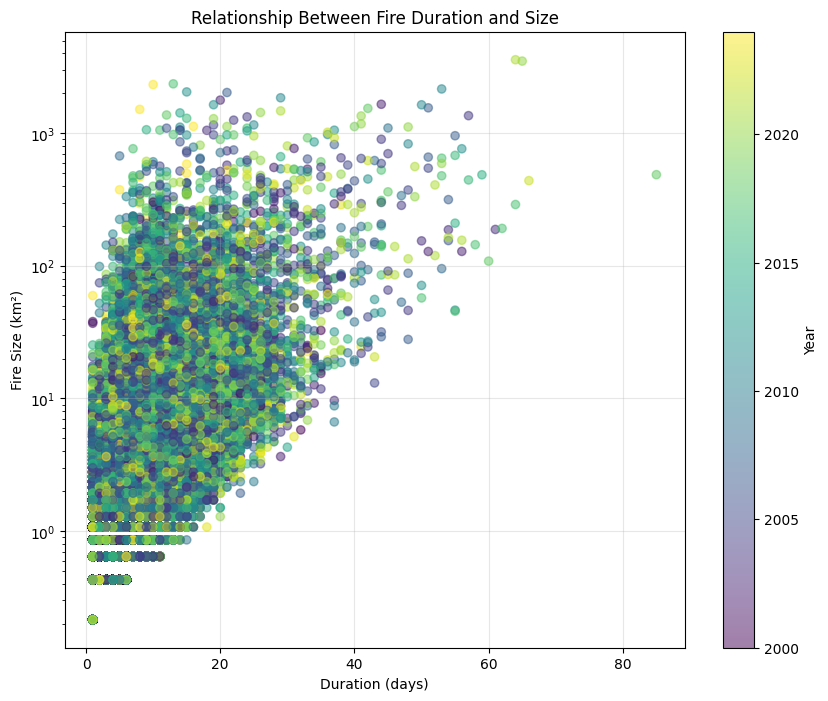

/var/folders/xh/jjqjnhjj0m3gv9697kb8zk0r0000gn/T/ipykernel_73171/1515109640.py:141: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf_sample.geometry.centroid.y.mean()
/var/folders/xh/jjqjnhjj0m3gv9697kb8zk0r0000gn/T/ipykernel_73171/1515109640.py:142: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf_sample.geometry.centroid.x.mean()


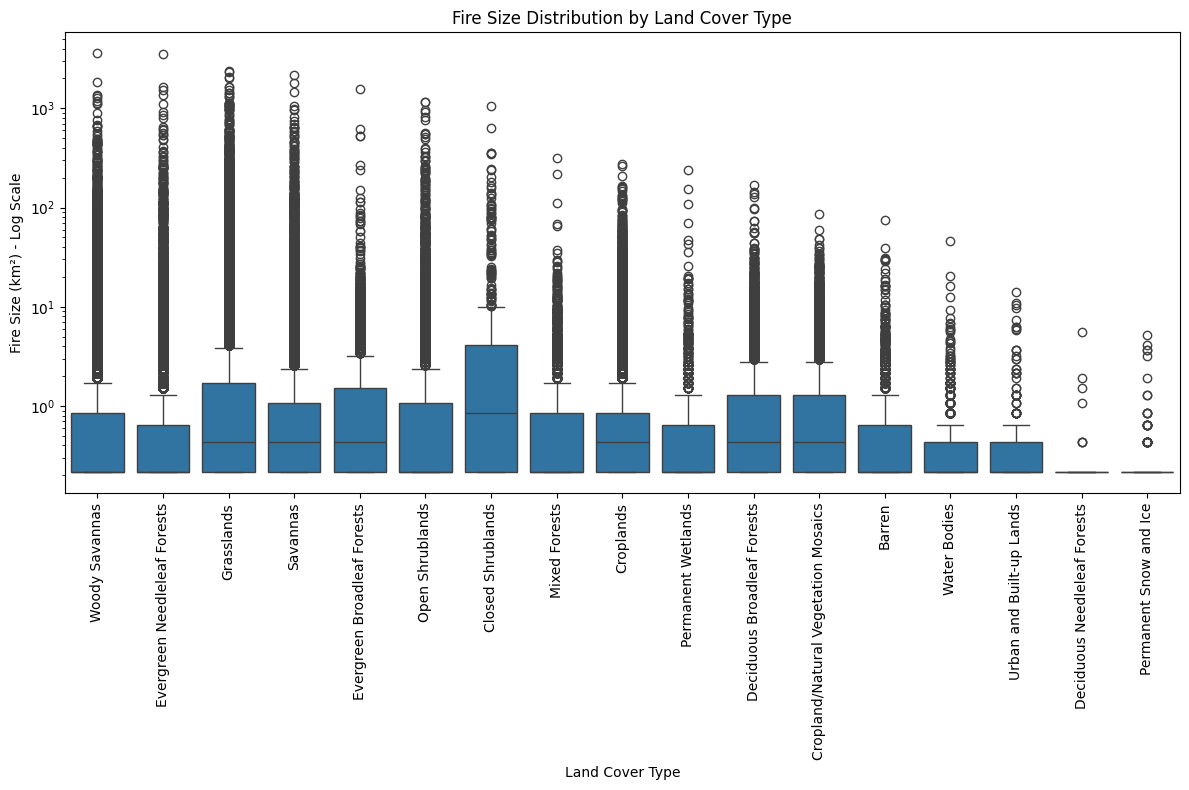

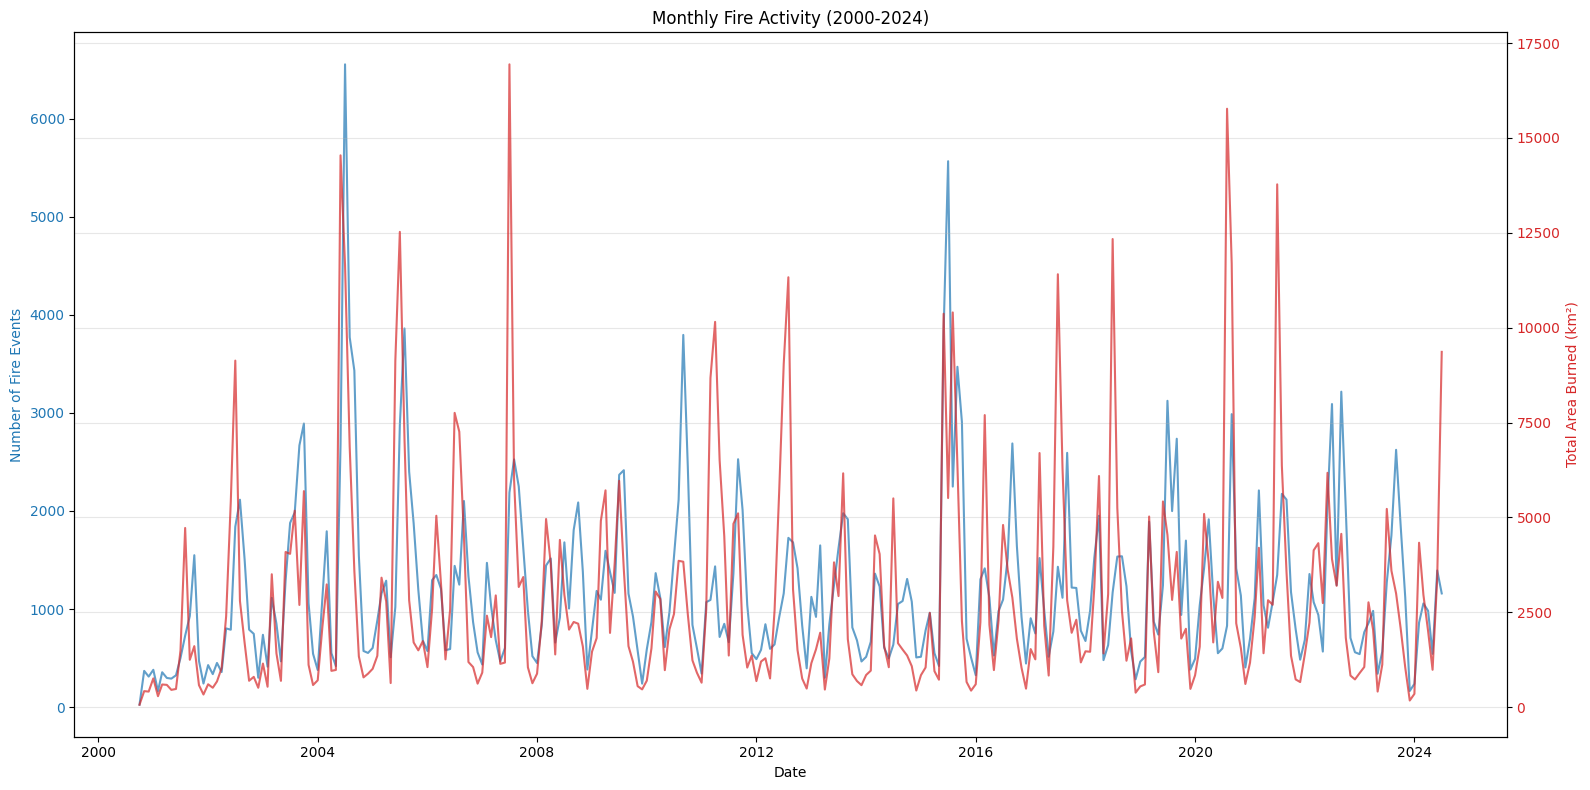

/var/folders/xh/jjqjnhjj0m3gv9697kb8zk0r0000gn/T/ipykernel_73171/1515109640.py:255: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.centroid.x,
/var/folders/xh/jjqjnhjj0m3gv9697kb8zk0r0000gn/T/ipykernel_73171/1515109640.py:256: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.centroid.y,


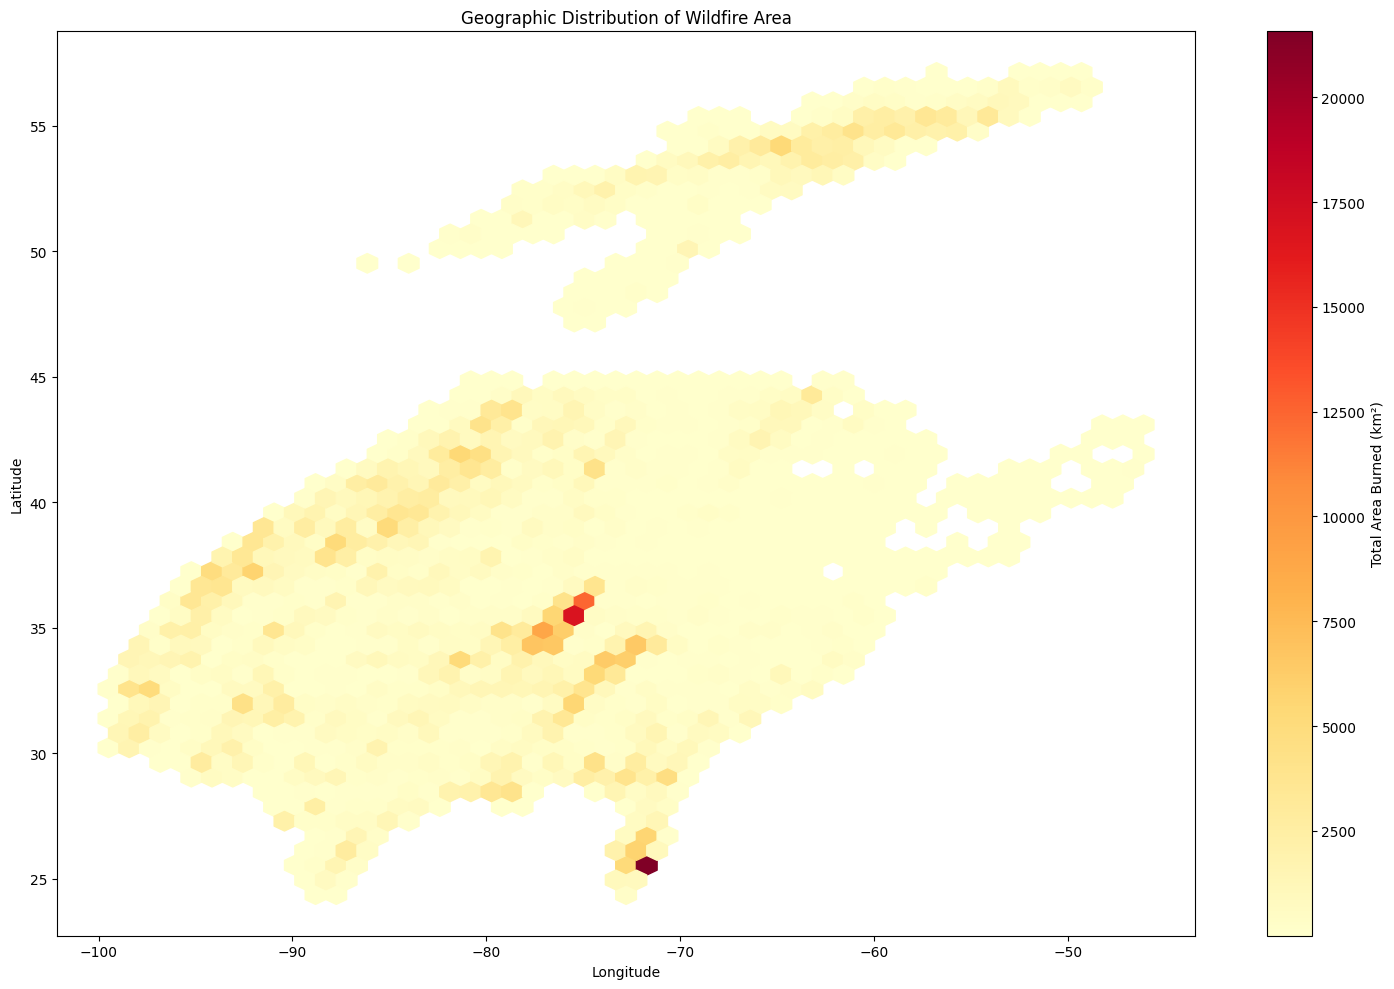

In [2]:
# Fire Event Visualizations
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.wkt import loads
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, HeatMap

# Ensure the DataFrame is properly loaded
df = fired_conus_ak_df.copy()

# Convert to GeoDataFrame for spatial analysis
if df['geometry'].dtype == 'object':
    df['geometry'] = df['geometry'].apply(lambda x: loads(x) if isinstance(x, str) else x)

# Convert to GeoDataFrame with the correct CRS
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:3857")  # Web Mercator projection

# Convert projection for proper visualization
gdf = gdf.to_crs(epsg=4326)  # Convert to WGS84 for standard mapping

# Basic statistics about the dataset
print(f"Total number of fire events: {len(gdf)}")
print(f"Date range: {gdf['ig_date'].min()} to {gdf['ig_date'].max()}")
print(f"Total area burned: {gdf['tot_ar_km2'].sum():.2f} km²")

# 1. Temporal Analysis - Fire Events by Year
yearly_fires = gdf.groupby('ig_year').size()
yearly_area = gdf.groupby('ig_year')['tot_ar_km2'].sum()

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fire Events', color='tab:blue')
ax1.bar(yearly_fires.index, yearly_fires.values, color='tab:blue', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Total Area Burned (km²)', color='tab:red')
ax2.plot(yearly_area.index, yearly_area.values, color='tab:red', linewidth=2, marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Wildfire Events and Area Burned by Year (2000-2024)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

# 2. Land Cover Analysis
plt.figure(figsize=(14, 8))
lc_area = gdf.groupby('lc_name')['tot_ar_km2'].sum().sort_values(ascending=False)

# Plot the top 10 land cover types by area burned
top_lc = lc_area.head(10)
ax = top_lc.plot(kind='bar', color='forestgreen', alpha=0.7)
plt.title('Top 10 Land Cover Types by Total Area Burned')
plt.xlabel('Land Cover Type')
plt.ylabel('Total Area Burned (km²)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Ecoregion Analysis
plt.figure(figsize=(14, 8))
eco_area = gdf.groupby('eco_name')['tot_ar_km2'].sum().sort_values(ascending=False)

# Plot the top 10 ecoregions by area burned
top_eco = eco_area.head(10)
ax = top_eco.plot(kind='bar', color='darkorange', alpha=0.7)
plt.title('Top 10 Ecoregions by Total Area Burned')
plt.xlabel('Ecoregion')
plt.ylabel('Total Area Burned (km²)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Fire Size Distribution
plt.figure(figsize=(12, 6))
sns.histplot(gdf['tot_ar_km2'], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Fire Sizes (log scale)')
plt.xlabel('Fire Size (km²)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# 5. Fire Duration Analysis
plt.figure(figsize=(12, 6))
sns.histplot(gdf['event_dur'], bins=30, kde=True)
plt.title('Distribution of Fire Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# 6. Seasonal Analysis
gdf['month'] = pd.to_datetime(gdf['ig_date']).dt.month
monthly_fires = gdf.groupby('month').size()
monthly_area = gdf.groupby('month')['tot_ar_km2'].sum()

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Fire Events', color='tab:blue')
ax1.bar(monthly_fires.index, monthly_fires.values, color='tab:blue', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax2 = ax1.twinx()
ax2.set_ylabel('Total Area Burned (km²)', color='tab:red')
ax2.plot(monthly_area.index, monthly_area.values, color='tab:red', linewidth=2, marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Seasonal Distribution of Wildfire Events and Area Burned')
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

# 7. Correlation between Fire Size and Duration
plt.figure(figsize=(10, 8))
plt.scatter(gdf['event_dur'], gdf['tot_ar_km2'], alpha=0.5, c=gdf['ig_year'], cmap='viridis')
plt.colorbar(label='Year')
plt.title('Relationship Between Fire Duration and Size')
plt.xlabel('Duration (days)')
plt.ylabel('Fire Size (km²)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# 8. Interactive Map Visualization
sample_size = min(5000, len(gdf))  # Limit to 5000 events for performance
gdf_sample = gdf.sample(sample_size) if len(gdf) > sample_size else gdf

# Create a Folium map centered on the data
center_lat = gdf_sample.geometry.centroid.y.mean()
center_lon = gdf_sample.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=4, tiles='CartoDB positron')

# Add fire events as circles with size based on area and color based on year
years = gdf_sample['ig_year'].unique()
years.sort()
year_colors = cm.viridis(np.linspace(0, 1, len(years)))
year_to_color = {year: mcolors.rgb2hex(color) for year, color in zip(years, year_colors)}

# Add a MarkerCluster for better performance
marker_cluster = MarkerCluster().add_to(m)

# Add each fire event to the map
for idx, row in gdf_sample.iterrows():
    # Get the centroid of the fire polygon
    centroid = row.geometry.centroid
    
    # Create a popup with information about the fire
    popup_text = f"""
    <b>Fire ID:</b> {row['id']}<br>
    <b>Ignition Date:</b> {row['ig_date']}<br>
    <b>Area:</b> {row['tot_ar_km2']:.2f} km²<br>
    <b>Duration:</b> {row['event_dur']} days<br>
    <b>Land Cover:</b> {row['lc_name']}<br>
    <b>Ecoregion:</b> {row['eco_name']}
    """
    
    # Add a circle marker for the fire
    folium.CircleMarker(
        location=[centroid.y, centroid.x],
        radius=min(np.sqrt(row['tot_ar_km2']) * 2, 15),  # Scale radius by area but cap it
        color=year_to_color[row['ig_year']],
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(marker_cluster)

# Add a legend for the years
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white; 
            padding: 10px; border: 2px solid grey; border-radius: 5px;">
<p><b>Fire Year</b></p>
'''

# Add a color for each year
for year in sorted(years):
    legend_html += f'<p><i class="fa fa-circle" style="color:{year_to_color[year]}"></i> {year}</p>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m

# 9. Heatmap of Fire Locations
# Create a heatmap of fire locations weighted by area
# Create a new map for the heatmap
m_heat = folium.Map(location=[center_lat, center_lon], zoom_start=4, tiles='CartoDB dark_matter')

# Prepare data for heatmap
heat_data = [[row.geometry.centroid.y, row.geometry.centroid.x, row['tot_ar_km2']] 
             for idx, row in gdf_sample.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m_heat)

# Display the heatmap
m_heat

# 10. Fire Size by Land Cover Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='lc_name', y='tot_ar_km2', data=gdf.sort_values('tot_ar_km2', ascending=False))
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Fire Size Distribution by Land Cover Type')
plt.xlabel('Land Cover Type')
plt.ylabel('Fire Size (km²) - Log Scale')
plt.tight_layout()
plt.show()

# 11. Time Series of Monthly Fire Activity
# Create a time series of monthly fire counts and area
gdf['year_month'] = pd.to_datetime(gdf['ig_date']).dt.to_period('M')
monthly_time_series = gdf.groupby('year_month').agg({
    'id': 'count',
    'tot_ar_km2': 'sum'
}).reset_index()
monthly_time_series['year_month'] = monthly_time_series['year_month'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Fire Events', color='tab:blue')
ax1.plot(monthly_time_series['year_month'], monthly_time_series['id'], color='tab:blue', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Total Area Burned (km²)', color='tab:red')
ax2.plot(monthly_time_series['year_month'], monthly_time_series['tot_ar_km2'], color='tab:red', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Monthly Fire Activity (2000-2024)')
plt.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

# 12. Geographic Distribution by State (if state information is available)
# Create a hexbin plot of fire locations
plt.figure(figsize=(15, 10))
hb = plt.hexbin(
    gdf.geometry.centroid.x, 
    gdf.geometry.centroid.y, 
    C=gdf['tot_ar_km2'], 
    gridsize=50, 
    cmap='YlOrRd', 
    mincnt=1,
    reduce_C_function=np.sum
)
plt.colorbar(hb, label='Total Area Burned (km²)')
plt.title('Geographic Distribution of Wildfire Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [5]:
import geopandas as gpd
import folium
import contextily as ctx

# Load Geospatial Data (Choose the correct file)
shapefile_path = "../data/conus_ak/fired_conus_ak_2000_to_2024_events.shp" 
geopackage_path = "../data/conus_ak/fired_conus_ak_2000_to_2024_events.cpg"  
csv_path = "../data/conus_ak/fired_conus_ak_2000_to_2024_events.csv"

# Load Shapefile or GeoPackage
if shapefile_path:
    gdf = gpd.read_file(shapefile_path)
elif geopackage_path:
    gdf = gpd.read_file(geopackage_path)
else:
    raise ValueError("No valid geospatial file found!")

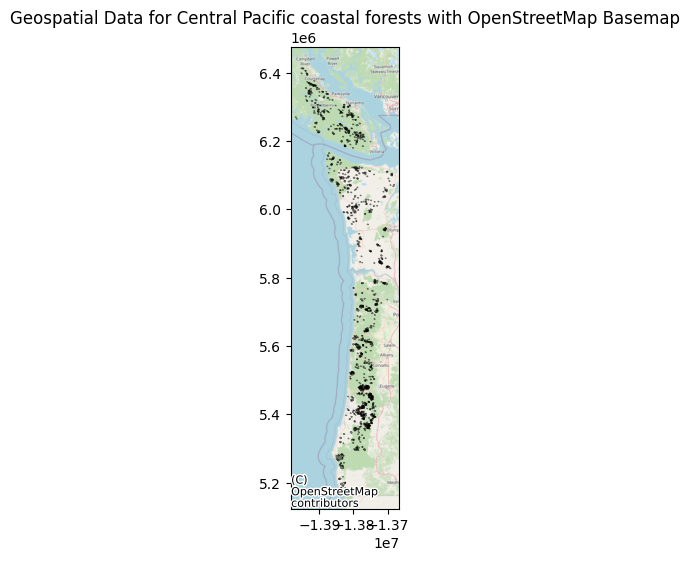

In [11]:
# Convert projection to WGS84 for filtering
gdf = gdf.to_crs(epsg=4326)

# Define area of interest (e.g., a specific ecoregion or bounding box)
area_of_interest = "Central Pacific coastal forests"
gdf_filtered = gdf[gdf["eco_name"] == area_of_interest]

# Ensure there is data to display
if gdf_filtered.empty:
    raise ValueError(f"No data found for the specified area: {area_of_interest}")

# Convert filtered data to Web Mercator for mapping
gdf_filtered = gdf_filtered.to_crs(epsg=3857)

# Plot the filtered map
fig, ax = plt.subplots(figsize=(10, 6))
gdf_filtered.plot(ax=ax, alpha=0.5, edgecolor="black", cmap="OrRd")

# Use OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title(f"Geospatial Data for {area_of_interest} with OpenStreetMap Basemap")
plt.show()

In [ ]:
# Convert projection to WGS84 (EPSG:4326) for mapping
gdf = gdf.to_crs(epsg=4326)

# Define a specific area of interest (e.g., filtering by an ecoregion)
area_of_interest = "Central Pacific coastal forests"  # Change to your desired region
gdf_filtered = gdf[gdf["eco_name"] == area_of_interest]

# Ensure there is data to display
if gdf_filtered.empty:
    raise ValueError(f"No data found for the specified area: {area_of_interest}")

# Compute the centroid for focusing the map
centroid = gdf_filtered.geometry.centroid
m = folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=7)

# Add geospatial data to the Folium map
for _, row in gdf_filtered.iterrows():
    geojson = row["geometry"].__geo_interface__
    folium.GeoJson(geojson, tooltip=f"ID: {row.get('id', 'N/A')}").add_to(m)

m

## Landfire Data (CONUS)

EDA on topographical data (aspect, slope, elevation).

## Terrain Characteristics for Wildfire Modeling

These datasets describe different **terrain characteristics** and are essential for **wildfire modeling, hydrology, and land-use planning**.

### Topographical Data

| **Topographical Data**  | **Description**  | **Why It Matters?**  |
|------------------------|----------------|---------------------|
| **Aspect (ASP)**      | The direction a slope faces, measured in degrees from **0° (North) to 360°** (full circle). | Affects **wildfire spread, vegetation growth, and moisture retention**. South-facing slopes are **drier and more fire-prone** in the Northern Hemisphere. |
| **Elevation (ELEV)**  | The height above sea level in meters. | Impacts **climate, vegetation, and fire behavior**. Higher elevations may have **different fire risks** due to temperature and oxygen levels. |
| **Slope Degrees (SLP/SlpD)** | The **steepness of the terrain**, measured in degrees (**0° flat to 90° vertical**). | Influences **fire spread rate and erosion**. Steeper slopes can **accelerate fire spread uphill**. |
| **Slope Percent Rise (SlpP)** | The **ratio of vertical rise to horizontal distance**, expressed as a **percentage**. | More **intuitive for modeling land steepness**. Used in **hydrology and construction planning**. |

---

## How These Affect Wildfire Behavior

### **Aspect (Direction of Slope)**
- **South-facing slopes** get more sun, making them **drier and more flammable**.
- **North-facing slopes** retain **more moisture**, reducing fire risk.

### **Elevation (Height Above Sea Level)**
- Fires **burn faster at lower elevations** due to **higher oxygen levels**.
- **High-elevation fires** may be **slower but harder to extinguish**.

### **Slope (Steepness)**
- Fires **spread faster uphill** due to **rising heat**.
- **Steeper slopes** → More **erosion and post-fire landslides**.



In [3]:
ELEV_DATA_DIR = '../data/LF2020_Elev_220_CONUS'

elev_df = pd.read_csv(os.path.join(ELEV_DATA_DIR, 'CSV_Data/LF20_Elev_220.csv'))

elev_df.head()

,VALUE,COUNT
0,-117,31
1,-116,11
2,-115,9
3,-114,5
4,-113,2


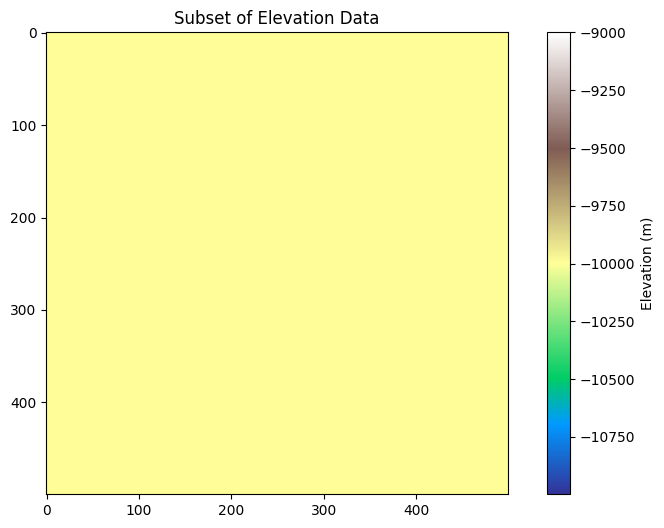

In [18]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# Load the raster file
elevation_file = os.path.join(ELEV_DATA_DIR, "Tif/LC20_Elev_220.tif")

with rasterio.open(elevation_file) as dataset:
    # Read the first band (assuming the data is in the first band)
    elevation_data = dataset.read(1)
    
    # You can subset the data to a smaller region using a slice or specific bounding box
    # For example, visualize the top-left corner of the image
    cropped_data = elevation_data[:500, :500]  # Adjust these indices to focus on your region of interest
    
    # Plot the subsetted elevation data
    plt.figure(figsize=(10, 6))
    plt.imshow(cropped_data, cmap='terrain')
    plt.colorbar(label="Elevation (m)")
    plt.title("Subset of Elevation Data")
    plt.show()


   Id  gridcode                                           geometry
0   1         1  POLYGON ((2257425 2730345, 2256855 2730345, 22...
1   2         1  POLYGON ((2197095 2649525, 2196015 2649525, 21...
2   3         1  POLYGON ((2009985 2269215, 2009625 2269215, 20...
3   4         1  POLYGON ((-2326575 1955715, -2327475 1955715, ...
4   5         1  POLYGON ((-2122905 1472295, -2123265 1472295, ...


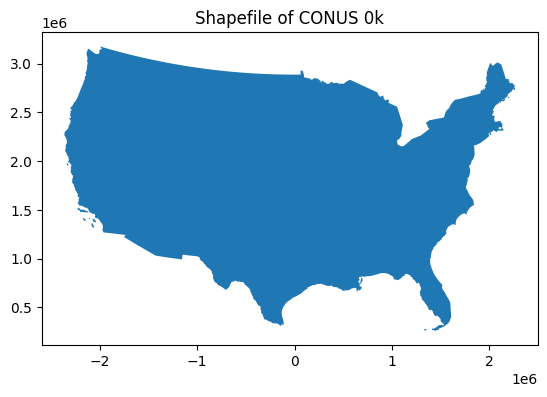

In [19]:
import geopandas as gpd

# Load shapefiles (you need to provide the full path to your files)
shapefile = os.path.join(ELEV_DATA_DIR, "Spatial_Metadata/conus_0k.shp")

gdf = gpd.read_file(shapefile)

# Check the first few rows of the shapefile
print(gdf.head())

# Plot the shapefile (you can filter by region or attributes)
gdf.plot()
plt.title("Shapefile of CONUS 0k")
plt.show()

In [21]:
with rasterio.open(elevation_file) as dataset:
    elevation_data = dataset.read(1)
    elevation_data = elevation_data[elevation_data != dataset.nodata]  # Remove NoData values

# Compute statistics
min_elev = np.min(elevation_data)
max_elev = np.max(elevation_data)
mean_elev = np.mean(elevation_data)
median_elev = np.median(elevation_data)
std_elev = np.std(elevation_data)

# Print summary
print(f"Elevation Statistics:\n"
      f"Min: {min_elev} m, Max: {max_elev} m\n"
      f"Mean: {mean_elev:.2f} m, Median: {median_elev:.2f} m\n"
      f"Standard Deviation: {std_elev:.2f} m")

# Plot histogram of elevation values
plt.figure(figsize=(10, 5))
plt.hist(elevation_data.flatten(), bins=50, color='green', alpha=0.7, edgecolor='black')
plt.xlabel("Elevation (m)")
plt.ylabel("Frequency")
plt.title("Elevation Histogram")
plt.grid(True)
plt.show()


: 

In [4]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# Load the raster file
elevation_file = os.path.join(ELEV_DATA_DIR, "Tif/LC20_Elev_220.tif")

with rasterio.open(elevation_file) as dataset:
    # Read the first band (assuming the data is in the first band)
    elevation_data = dataset.read(1)

# Mask NoData values
elevation_data = np.where(elevation_data == dataset.nodata, np.nan, elevation_data)

# Plot elevation heatmap
plt.figure(figsize=(10, 6))
plt.imshow(elevation_data, cmap='terrain', interpolation='nearest')
plt.colorbar(label="Elevation (m)")
plt.title("Elevation Heatmap")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

NameError: name 'np' is not defined

In [1]:
from mpl_toolkits.mplot3d import Axes3D

# Extract a smaller portion of the data for 3D visualization
sample_size = 300  # Reduce size for better rendering
subset = elevation_data[:sample_size, :sample_size]

# Create 3D mesh grid
x = np.linspace(0, subset.shape[1], subset.shape[1])
y = np.linspace(0, subset.shape[0], subset.shape[0])
X, Y = np.meshgrid(x, y)

# Plot 3D terrain
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, subset, cmap='terrain', edgecolor='none')
ax.set_title("3D Elevation Surface")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_zlabel("Elevation (m)")

plt.show()

NameError: name 'elevation_data' is not defined